In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

In [2]:
import pandas as pd

In [5]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [7]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

This means the column fuel unit has 180 missing values. Dropping so many values is impratical so we'll probably replace the values with the more common fuel type. Though we have to be careful cause wrong entry can mess up our data calculations so we'll look at the 'fuel type' column in detail

In [8]:
df['fuel_unit']

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

We see that fuel type is of the categorical kind so our first instinct will be to group them together

In [11]:
df.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

As we can see above, the mcf fuel unit is the most common type of fuel unit hence we can reasonably assume that mosr if not all of the missing values can be 'mcf' thus we'll replace said missing values 

In [16]:
df[['fuel_unit']]=df[['fuel_unit']].fillna(value='mcf')
df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [25]:
hist_df = df[['fuel_unit']].groupby('fuel_unit')[['fuel_unit']].count()
hist_df

,fuel_unit
fuel_unit,
bbl,7998
gal,84
gramsU,464
kgU,110
mcf,11534
mmbtu,180
mwdth,95
mwhth,100
ton,8958


In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='fuel_unit'>

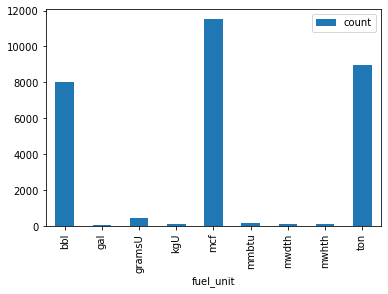

In [32]:
hist_df.rename(columns={'fuel_unit':'count'},inplace = True)
hist_df.reset_index(drop = False)
hist_df.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

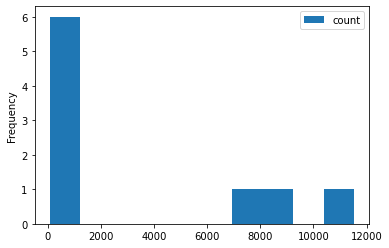

In [33]:
hist_df.plot(kind='hist')